<a href="https://colab.research.google.com/github/obedevieira/Dados_bitcoin/blob/main/Notebook_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pandas matplotlib numpy seaborn

* Nota média por município
* Apenas a título de ilustração, imputar o missing na prova de Matemática pela média ou mediana de algum grupo ou grupos escolhido.
* Quais municípios possuem a maior quantidade de inscritos.

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('dados_enem_2021_BA.csv')

In [5]:
df.shape

(237773, 51)

In [6]:
# 5 primeiras linhas
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200.0,Ruy Barbosa,29.0,BA,1.0,1.0,1.0,1.0,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1.0,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0.0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408.0,Salvador,29.0,BA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201.0,Barreiras,29.0,BA,1.0,1.0,1.0,1.0,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0.0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802.0,Santo Estêvão,29.0,BA,1.0,1.0,1.0,1.0,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800.0,Feira de Santana,29.0,BA,1.0,1.0,1.0,1.0,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0.0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0


* Média na nota de Matemática por gênero

In [7]:
subset_tp_sexo_m = df.query('TP_SEXO == "M"')

In [8]:
subset_tp_sexo_f = df.query('TP_SEXO == "F"')

Agregação:
* `df.column.agg_func()`

In [9]:
# nota máximo do Gênero masculino
subset_tp_sexo_m.NU_NOTA_MT.max()

953.1

In [10]:
# nota máxima do gênero feminino
subset_tp_sexo_f.NU_NOTA_MT.max()

944.1

In [11]:
# nota média do Gênero masculino
subset_tp_sexo_m.NU_NOTA_MT.mean()

540.2061472864312

In [12]:
# nota máxima do gênero feminino
subset_tp_sexo_f.NU_NOTA_MT.mean()

501.51563102230494

In [13]:
# nota média do Gênero masculino
subset_tp_sexo_m.NU_NOTA_MT.median()

523.8

In [14]:
# nota máxima do gênero feminino
subset_tp_sexo_f.NU_NOTA_MT.median()

479.4

In [15]:
provas = df.columns[(df.columns.str.contains('NOTA')) & (~df.columns.str.contains('COMP'))].tolist()
idCandidato = ['NU_INSCRICAO']

In [16]:
subset_tp_sexo_m[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)

<ipython-input-16-d54f3f50b6df>:1: FutureWarning: The provided callable <function min at 0x7ccfd5721260> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  subset_tp_sexo_m[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)
<ipython-input-16-d54f3f50b6df>:1: FutureWarning: The provided callable <function mean at 0x7ccfd5721b20> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset_tp_sexo_m[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)
<ipython-input-16-d54f3f50b6df>:1: FutureWarning: The provided callable <function median at 0x7ccfd2b66200> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  subset_tp_sexo_m[prova

,min,mean,median,max
NU_NOTA_CN,0.0,495.72,488.6,839.0
NU_NOTA_CH,0.0,520.29,523.5,846.9
NU_NOTA_LC,0.0,497.09,499.8,773.5
NU_NOTA_MT,0.0,540.21,523.8,953.1
NU_NOTA_REDACAO,0.0,596.24,600.0,980.0


In [17]:
subset_tp_sexo_f[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)

<ipython-input-17-a9a96adbdbc6>:1: FutureWarning: The provided callable <function min at 0x7ccfd5721260> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  subset_tp_sexo_f[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)
<ipython-input-17-a9a96adbdbc6>:1: FutureWarning: The provided callable <function mean at 0x7ccfd5721b20> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  subset_tp_sexo_f[provas].agg([np.min, np.mean, np.median, np.max]).T.round(2)
<ipython-input-17-a9a96adbdbc6>:1: FutureWarning: The provided callable <function median at 0x7ccfd2b66200> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  subset_tp_sexo_f[prova

,min,mean,median,max
NU_NOTA_CN,0.0,471.51,461.8,819.4
NU_NOTA_CH,0.0,499.76,494.3,832.5
NU_NOTA_LC,0.0,485.20,485.2,821.6
NU_NOTA_MT,0.0,501.52,479.4,944.1
NU_NOTA_REDACAO,0.0,618.08,600.0,1000.0


* Qual foi o aluno que tirou a nota máxima/mínima?

In [18]:
df.NU_NOTA_MT.max()

953.1

In [19]:
df.NU_NOTA_MT.idxmax()

55177

In [20]:
df.iloc[df.NU_NOTA_MT.idxmax(),]

,55177
NU_INSCRICAO,210053912306
NU_ANO,2021
TP_FAIXA_ETARIA,2
TP_SEXO,M
TP_ESTADO_CIVIL,1
TP_COR_RACA,3
TP_NACIONALIDADE,1
TP_ST_CONCLUSAO,2
TP_ANO_CONCLUIU,0
TP_ESCOLA,3


In [21]:
df.iloc[df.NU_NOTA_MT.idxmin(),]

,7951
NU_INSCRICAO,210053803513
NU_ANO,2021
TP_FAIXA_ETARIA,3
TP_SEXO,M
TP_ESTADO_CIVIL,1
TP_COR_RACA,3
TP_NACIONALIDADE,1
TP_ST_CONCLUSAO,2
TP_ANO_CONCLUIU,0
TP_ESCOLA,2


* Nota mínima na redação

O que representa o NaN em uma prova?

In [22]:
df[df.NU_NOTA_REDACAO.notna()].NU_NOTA_REDACAO.isna().sum()

0

In [23]:
mask_1 = df.NU_NOTA_REDACAO.notna()
mask_2 = df.NU_NOTA_REDACAO != 0
subset = df[(mask_1) & (mask_2)]

<Axes: ylabel='Frequency'>

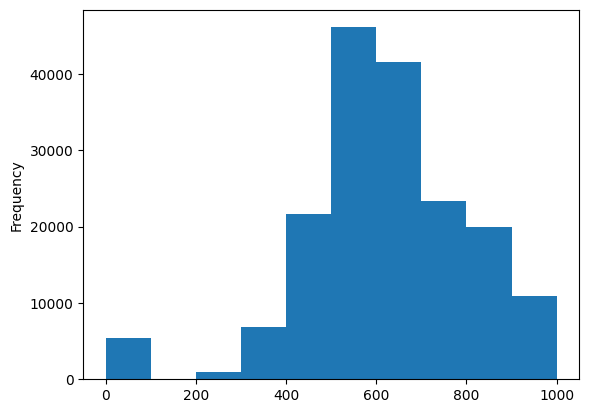

In [24]:
df.NU_NOTA_REDACAO.plot(kind = 'hist')

<Axes: >

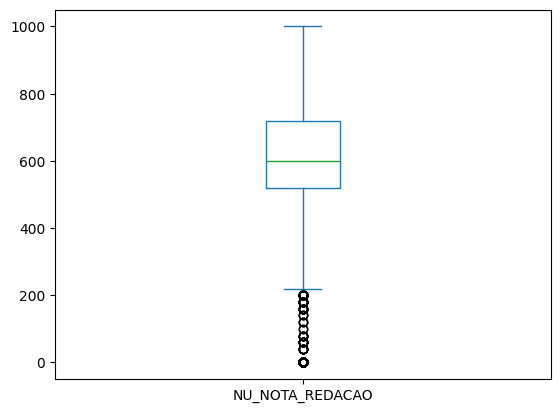

In [25]:
df.NU_NOTA_REDACAO.plot(kind = 'box')

<Axes: ylabel='Frequency'>

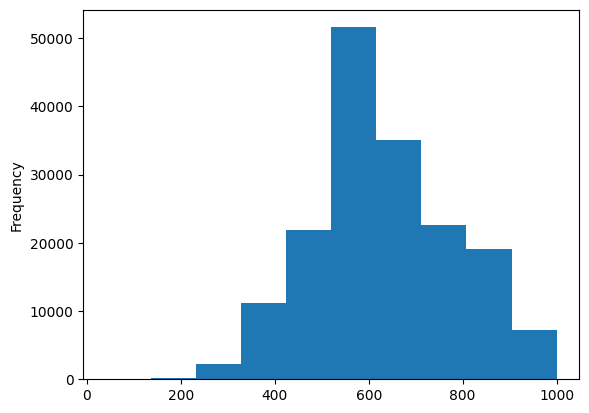

In [26]:
subset.NU_NOTA_REDACAO.plot(kind = 'hist')

<Axes: >

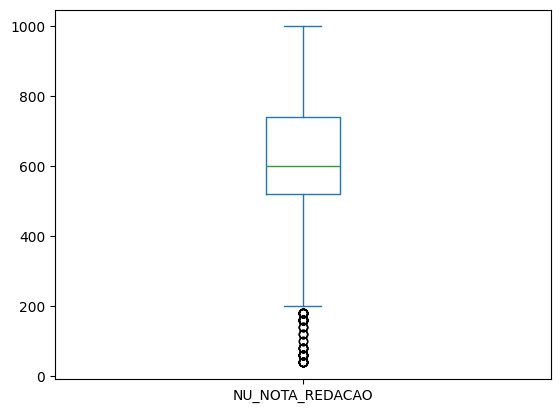

In [27]:
subset.NU_NOTA_REDACAO.plot(kind = 'box')

In [ ]:
subset.NU_NOTA_REDACAO.agg([np.min, np.mean, np.median, np.max])

amin        40.000000
mean       625.944838
median     600.000000
amax      1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

* Axis na função de agregação

In [ ]:
df[provas].mean()

NU_NOTA_CN         479.939563
NU_NOTA_CH         506.234466
NU_NOTA_LC         489.131131
NU_NOTA_MT         513.507987
NU_NOTA_REDACAO    606.276969
dtype: float64

In [ ]:
# média das colunas
df[provas].mean(axis = 0)

NU_NOTA_CN         479.939563
NU_NOTA_CH         506.234466
NU_NOTA_LC         489.131131
NU_NOTA_MT         513.507987
NU_NOTA_REDACAO    606.276969
dtype: float64

In [ ]:
# média dos alunos
df[provas].mean(axis = 1)

0         466.94
1            NaN
2         447.88
3         562.10
4         544.00
           ...  
266189       NaN
266190       NaN
266191       NaN
266192       NaN
266193       NaN
Length: 266194, dtype: float64

In [ ]:
(df.NU_NOTA_CH+df.NU_NOTA_LC+df.NU_NOTA_MT+df.NU_NOTA_CN+df.NU_NOTA_REDACAO) / 5

0         466.94
1            NaN
2         447.88
3         562.10
4         544.00
           ...  
266189       NaN
266190       NaN
266191       NaN
266192       NaN
266193       NaN
Length: 266194, dtype: float64

* Missing

Imputar missing : `.fillna()`

In [ ]:
# missing simbólico
# -1
df_copy = df.copy()
df_copy['MEAN'] = df[provas].mean(axis = 1)

In [ ]:
df_copy.MEAN.fillna(-1)

0         466.94
1          -1.00
2         447.88
3         562.10
4         544.00
           ...  
266189     -1.00
266190     -1.00
266191     -1.00
266192     -1.00
266193     -1.00
Name: MEAN, Length: 266194, dtype: float64

Imputar pela média

In [ ]:
mean = np.mean(df_copy.MEAN)

<Axes: >

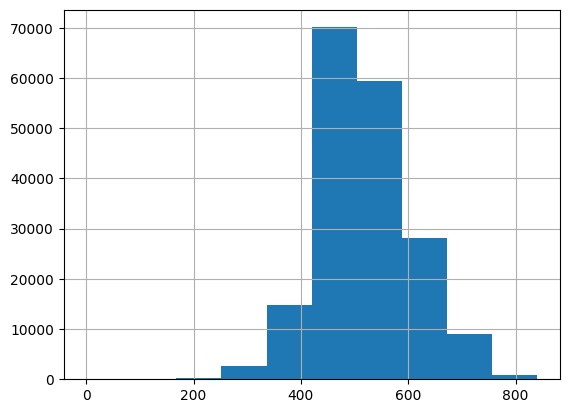

In [ ]:
df_copy.MEAN.hist()

<Axes: >

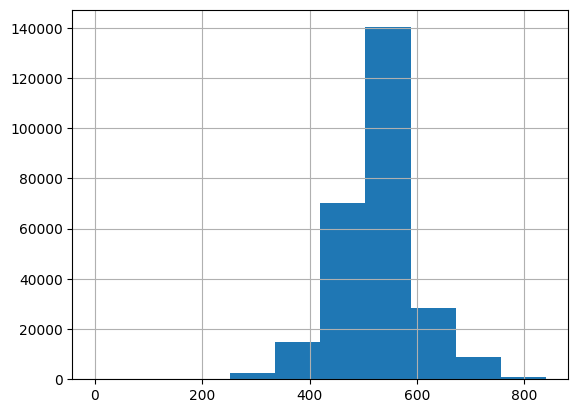

In [ ]:
df_copy.MEAN.fillna(mean).hist()

Imputar pela mediana

In [ ]:
df_copy.MEAN.median()

509.26000000000005

In [ ]:
median = df_copy.MEAN.median()

In [ ]:
df_copy.MEAN.fillna(median)

0         466.94
1         509.26
2         447.88
3         562.10
4         544.00
           ...  
266189    509.26
266190    509.26
266191    509.26
266192    509.26
266193    509.26
Name: MEAN, Length: 266194, dtype: float64

* Agrupamento

Qual a proporção entre os gêneros?

In [ ]:
df.TP_SEXO.value_counts()

F    171997
M     94197
Name: TP_SEXO, dtype: int64

In [ ]:
df.groupby(by = ['TP_SEXO'])['NU_INSCRICAO'].count()

TP_SEXO
F    171997
M     94197
Name: NU_INSCRICAO, dtype: int64

In [ ]:
df.TP_ESCOLA.value_counts()

1    177170
2     76984
3     12040
Name: TP_ESCOLA, dtype: int64

In [ ]:
df.groupby(by = ['TP_SEXO', 'TP_ESCOLA'])['NU_INSCRICAO'].count()

TP_SEXO  TP_ESCOLA
F        1            114715
         2             50561
         3              6721
M        1             62455
         2             26423
         3              5319
Name: NU_INSCRICAO, dtype: int64

Qual a distribuição de frequência dos alunos por tipo de escola?

In [ ]:
df.groupby(by = ['TP_ESCOLA'])['NU_INSCRICAO'].count().sort_index()

TP_ESCOLA
1    177170
2     76984
3     12040
Name: NU_INSCRICAO, dtype: int64

Qual o desempenho em Matemática por tipo de escola?

In [ ]:
df.groupby(by = ['TP_ESCOLA'])['NU_NOTA_MT'].mean()

TP_ESCOLA
1    519.016313
2    487.375050
3    579.833900
Name: NU_NOTA_MT, dtype: float64

In [ ]:
df.groupby(by = ['TP_ESCOLA'])[['NU_NOTA_MT', 'NU_NOTA_CN']].mean()

,NU_NOTA_MT,NU_NOTA_CN
TP_ESCOLA,,
1,519.016313,485.694886
2,487.375050,458.415743
3,579.833900,522.752945


In [ ]:
df.groupby(by = ['TP_ESCOLA'])[['NU_NOTA_MT', 'NU_NOTA_CN']].agg([np.min, np.median, np.mean, np.std, np.max]).T

TP_ESCOLA                   1           2           3
NU_NOTA_MT amin      0.000000    0.000000    0.000000
           median  497.800000  468.900000  581.600000
           mean    519.016313  487.375050  579.833900
           std     103.686183   83.768416  110.520092
           amax    953.100000  929.800000  953.100000
NU_NOTA_CN amin      0.000000    0.000000  340.100000
           median  476.500000  451.700000  523.100000
           mean    485.694886  458.415743  522.752945
           std      76.762272   63.182395   79.613322
           amax    839.000000  819.400000  796.300000

In [ ]:
(
    df
    .groupby(by = ['TP_ESCOLA'])[['NU_NOTA_MT', 'NU_NOTA_CN']]
    .agg([np.min, np.median, np.mean, np.std, np.max])
    .T
)

TP_ESCOLA                   1           2           3
NU_NOTA_MT amin      0.000000    0.000000    0.000000
           median  497.800000  468.900000  581.600000
           mean    519.016313  487.375050  579.833900
           std     103.686183   83.768416  110.520092
           amax    953.100000  929.800000  953.100000
NU_NOTA_CN amin      0.000000    0.000000  340.100000
           median  476.500000  451.700000  523.100000
           mean    485.694886  458.415743  522.752945
           std      76.762272   63.182395   79.613322
           amax    839.000000  819.400000  796.300000

In [ ]:
(
    df.groupby(by = ['TP_ESCOLA'])
    .agg({
        'NU_NOTA_MT' : [np.mean, np.median],
        'NU_NOTA_CN' : [np.min, np.max]
    }
    )
)

NU_NOTA_MT        NU_NOTA_CN       
                 mean median       amin   amax
TP_ESCOLA                                     
1          519.016313  497.8        0.0  839.0
2          487.375050  468.9        0.0  819.4
3          579.833900  581.6      340.1  796.3

* Nota média por município

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,MEAN
0,210051128744,2021,4,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927200,Ruy Barbosa,29,BA,1,1,1,1,909.0,881.0,892.0,899.0,507.6,539.2,494.6,413.3,BAEDEBDECCEAEDDCBDEDAEECEEEDBDECBDCECBCCDABED,EEEBAABCBCDBEAEBEACEDDEDECACBDBCDACECDAECBCBD,99999ACAEEEEBDEACDACDEABCEABBDEDBAEEBDEEACDBAC...,BACEACDACBAAAEDCECABBACDCDBBA.CEABCDADADBECBE,1,EDECABEDABCBEBACCDCBBEEBBCBDAAECDCBDCDBBBADCD,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,EEXEBABDDCECCBCCECDCAEBADEABBDBDEDCEDCCADDCAB,1.0,80.0,120.0,80.0,80.0,20.0,380.0,466.94
1,210054173438,2021,5,F,1,2,1,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,1.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,210052118573,2021,3,F,1,3,1,2,0,2,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903201,Barreiras,29,BA,1,1,1,1,912.0,882.0,891.0,901.0,439.6,437.7,455.9,446.2,BCEDEACAEDCEDCBDDCCAADABADDEBEECBACDCCABBDCCA,AAEADCDCAAADCBBBAABBEAEDABCDAACDDCBDAAABAABBB,EDBEC99999DDAAEBBDCDBBAABDECAADAEACCDABCEABABE...,EBBEBDCCDDCDCBADABBBCCEABDADCBCCACBDACDCDADCE,0,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,80.0,120.0,80.0,100.0,80.0,460.0,447.88
3,210052350230,2021,10,F,1,2,1,1,8,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2928802,Santo Estêvão,29,BA,1,1,1,1,911.0,880.0,890.0,902.0,548.1,619.5,676.3,386.6,CCAECCADEAADDEDDEECEDDEADDDCACDEDCDCDEADBEDDE,DBBEADDCABABCECEAEBEAEDCBCAEABEEDEBBEAABCBDCD,ABCCA99999DDCACDCACABBEAAEBDAEEBDEEAADACEEDDDB...,CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,120.0,100.0,120.0,120.0,580.0,562.10
4,210053156861,2021,9,M,1,2,1,1,5,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2910800,Feira de Santana,29,BA,1,1,1,1,1014.0,1000.0,1004.0,1010.0,465.2,613.1,522.1,579.6,CDCCBDBBDCBACEBDACBCACADBCBECCEBCDDEBDACEECCD,CCBAADECCBACBECCBEADAEBEACBEBBEADEBBABDACDEBC,BADCE99999DABAABBABBBCEDBDCDABEABCBBDCACBABAAA...,CCBACBBCCCCEDDDDCBCCDCACCCBBBDDDBCBADDBCABACA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,100.0,120.0,100.0,120.0,100.0,540.0,544.00


In [ ]:
df.NO_MUNICIPIO_PROVA

0              Ruy Barbosa
1                 Salvador
2                Barreiras
3            Santo Estêvão
4         Feira de Santana
                ...       
266189          Alagoinhas
266190            Juazeiro
266191            Salvador
266192            Salvador
266193            Salvador
Name: NO_MUNICIPIO_PROVA, Length: 266194, dtype: object

<Axes: >

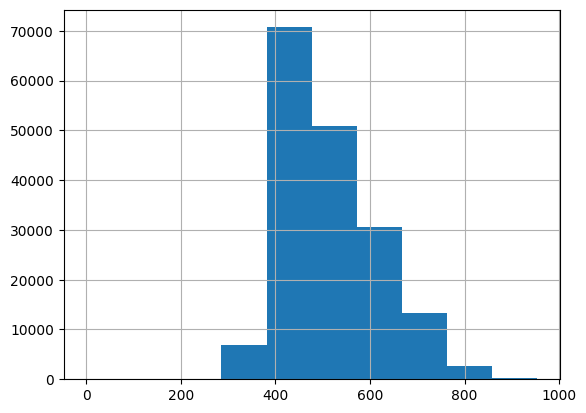

In [ ]:
df.NU_NOTA_MT.hist()

In [ ]:
df_visao_municipio = (
    df
    .query('NU_NOTA_MT != 0 ')
    .groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index = False)['NU_NOTA_MT']
    .agg([np.min, np.mean, np.median, np.max])
    .reset_index(drop = False)
    .rename(
        columns = {
            'CO_MUNICIPIO_PROVA' : 'COD_IBGE',
            'NO_MUNICIPIO_PROVA': 'Município',
            'amin' : 'Mínimo_MT',
            'mean' : 'Média_MT',
            'median' : 'Mediana_MT',
            'amax' : 'Máximo_MT'
                  })
    .sort_values(by = ['Máximo_MT', 'Média_MT', 'Mediana_MT'], ascending = False)
    .reset_index(drop = True)
)

In [ ]:
df_visao_municipio.head()

,Município,COD_IBGE,Mínimo_MT,Média_MT,Mediana_MT,Máximo_MT
0,Vitória da Conquista,2933307,315.5,536.491289,517.30,953.1
1,Salvador,2927408,315.3,534.623544,515.60,953.1
2,Barreiras,2903201,318.8,517.589528,496.80,948.8
3,Feira de Santana,2910800,316.0,525.103365,502.90,948.5
4,Serrinha,2930501,346.8,501.138564,479.85,948.5


In [ ]:
df_quantidade_inscritos = (
    df.groupby(by = ['NO_MUNICIPIO_PROVA', 'CO_MUNICIPIO_PROVA'], as_index = False)['NU_INSCRICAO']
    .count()
    .rename(columns = {'NO_MUNICIPIO_PROVA' : 'Município',
                       'CO_MUNICIPIO_PROVA' : 'COD_IBGE',
                       'NU_INSCRICAO' : 'Quantidade_inscritos'
                      })
    .sort_values(by = ['Quantidade_inscritos'], ascending = False)
    .reset_index(drop = True)
)

In [ ]:
total = df_quantidade_inscritos.Quantidade_inscritos.sum()

In [ ]:
df_quantidade_inscritos['Percentual_inscritos'] = (df_quantidade_inscritos.Quantidade_inscritos / total * 100).round(2)

In [ ]:
df_quantidade_inscritos['NU_ANO'] = 2021

In [ ]:
df_visao_municipio.head()

,Município,COD_IBGE,Mínimo,Média,Mediana,Máximo
0,Vitória da Conquista,2933307,315.5,536.491289,517.30,953.1
1,Salvador,2927408,315.3,534.623544,515.60,953.1
2,Barreiras,2903201,318.8,517.589528,496.80,948.8
3,Feira de Santana,2910800,316.0,525.103365,502.90,948.5
4,Serrinha,2930501,346.8,501.138564,479.85,948.5


In [ ]:
df_quantidade_inscritos.head()

,Município,COD_IBGE,Quantidade_inscritos,Percentual_inscritos,NU_ANO
0,Salvador,2927408,58502,21.98,2021
1,Feira de Santana,2910800,16689,6.27,2021
2,Vitória da Conquista,2933307,10792,4.05,2021
3,Barreiras,2903201,6083,2.29,2021
4,Lauro de Freitas,2919207,5647,2.12,2021


In [ ]:
df_municipio = pd.merge(
    df_visao_municipio.drop(columns = ['Município']),
    df_quantidade_inscritos,
    on = 'COD_IBGE',
    how = 'inner'
)

In [ ]:
df_municipio.head(10)

,COD_IBGE,Mínimo_MT,Média_MT,Mediana_MT,Máximo_MT,Município,Quantidade_inscritos,Percentual_inscritos,NU_ANO
0,2933307,315.5,536.491289,517.30,953.1,Vitória da Conquista,10792,4.05,2021
1,2927408,315.3,534.623544,515.60,953.1,Salvador,58502,21.98,2021
2,2903201,318.8,517.589528,496.80,948.8,Barreiras,6083,2.29,2021
3,2910800,316.0,525.103365,502.90,948.5,Feira de Santana,16689,6.27,2021
4,2930501,346.8,501.138564,479.85,948.5,Serrinha,2802,1.05,2021
5,2918407,315.1,513.699573,493.65,944.1,Juazeiro,5496,2.06,2021
6,2921203,358.4,493.272252,466.70,944.1,Miguel Calmon,839,0.32,2021
7,2918001,320.0,516.230168,496.90,939.7,Jequié,4414,1.66,2021
8,2925303,310.4,516.561479,497.00,929.5,Porto Seguro,2534,0.95,2021
9,2924009,347.0,514.556140,494.75,929.1,Paulo Afonso,3007,1.13,2021


In [ ]:
df_visao_municipio.merge(df_quantidade_inscritos, how = 'inner')

,Município,COD_IBGE,Mínimo_MT,Média_MT,Mediana_MT,Máximo_MT,Quantidade_inscritos,Percentual_inscritos,NU_ANO
0,Vitória da Conquista,2933307,315.5,536.491289,517.30,953.1,10792,4.05,2021
1,Salvador,2927408,315.3,534.623544,515.60,953.1,58502,21.98,2021
2,Barreiras,2903201,318.8,517.589528,496.80,948.8,6083,2.29,2021
3,Feira de Santana,2910800,316.0,525.103365,502.90,948.5,16689,6.27,2021
4,Serrinha,2930501,346.8,501.138564,479.85,948.5,2802,1.05,2021
...,...,...,...,...,...,...,...,...,...
157,Cansanção,2906808,360.9,475.027413,459.20,726.9,415,0.16,2021
158,Oliveira dos Brejinhos,2923209,380.6,505.673239,488.10,707.2,209,0.08,2021
159,Sento Sé,2930204,367.8,476.352846,462.30,702.3,200,0.08,2021
160,Umburanas,2932457,357.6,464.582090,453.50,686.9,225,0.08,2021


Crosstab